In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [37]:
# Number of points:
n = 10000
# Number of oscillations:
n_oscillations = 600 
# Frequency of the reference signal:
f_ref = 3.14 #[Hz]
# Amplitude of the reference signal:
A_ref = 0.001*np.sqrt(2.0) #V
# Phase of the reference signal:
p_ref = 0*np.pi/180
# Array of time:
t = np.linspace(0, n_oscillations/f_ref, n)
# Reference signal:
sin_ref = A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref)
# Slightly different signal:
sin_1 = 0.0012*np.sin(2.0*np.pi*3.15*t)

# Ideal Case of the Lock-in amplifier (Avaraging):

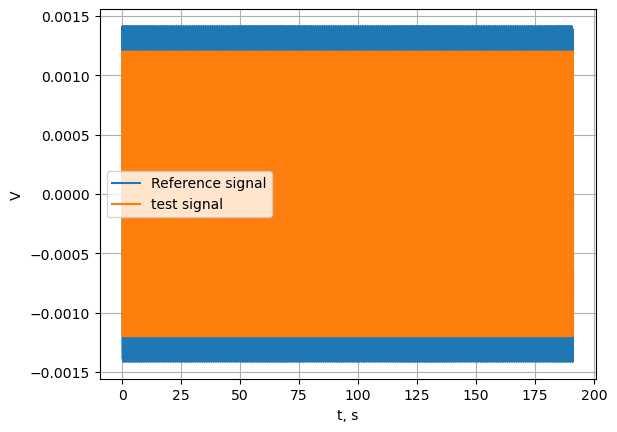

In [38]:
plt.plot(t,sin_ref, label="Reference signal")
plt.plot(t,sin_1, label="test signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

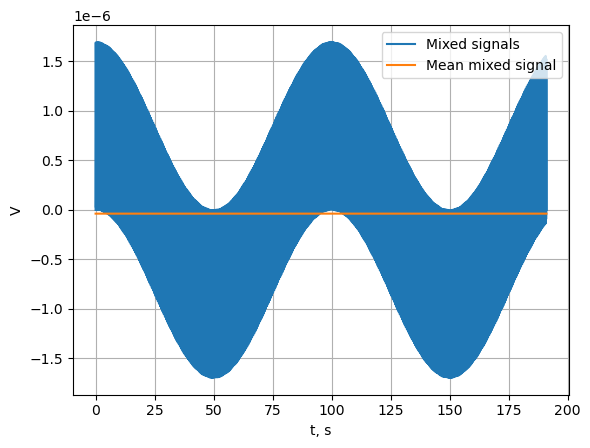

In [4]:
#mixing two signals:
plt.plot(t,np.multiply(sin_ref,sin_1), label="Mixed signals")
plt.plot(t,[np.mean(np.multiply(sin_ref,sin_1)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

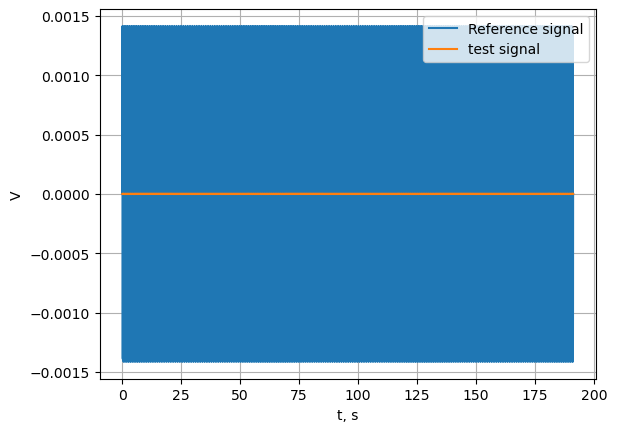

In [5]:
plt.plot(t,sin_ref, label="Reference signal")
plt.plot(t,1e-3*sin_ref, label="test signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

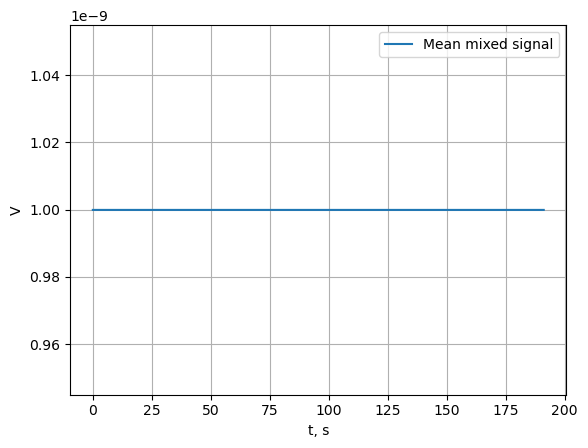

In [6]:
#mixing two signals:
#plt.plot(t,np.multiply(sin_ref,1e-3*sin_ref), label="Mixed signals")
plt.plot(t,[np.mean(np.multiply(sin_ref,1e-3*sin_ref)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

In [7]:
#Adding some noise:
noise_f = np.array([0.001*(2*np.random.random()-1) for a in range(n)])
noisy_1 = np.add(sin_ref, noise_f)
noisy_2 = np.add(sin_1, noise_f)

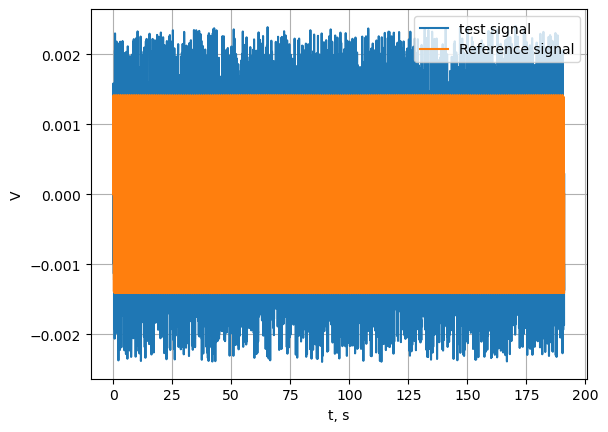

In [8]:
plt.plot(t,noisy_1, label="test signal")
plt.plot(t,sin_ref, label="Reference signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

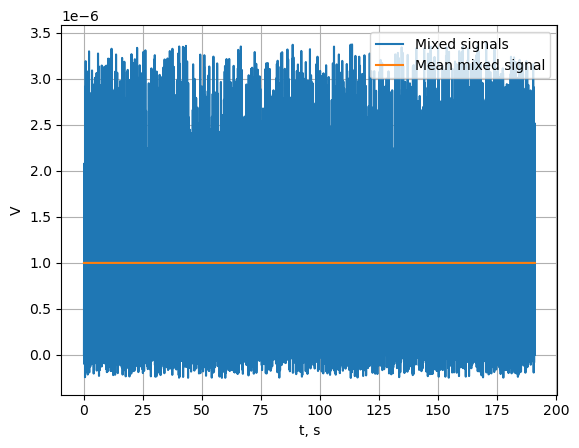

In [9]:
#mixing two signals:
plt.plot(t,np.multiply(sin_ref,noisy_1), label="Mixed signals")
plt.plot(t,[np.mean(np.multiply(sin_ref,noisy_1)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

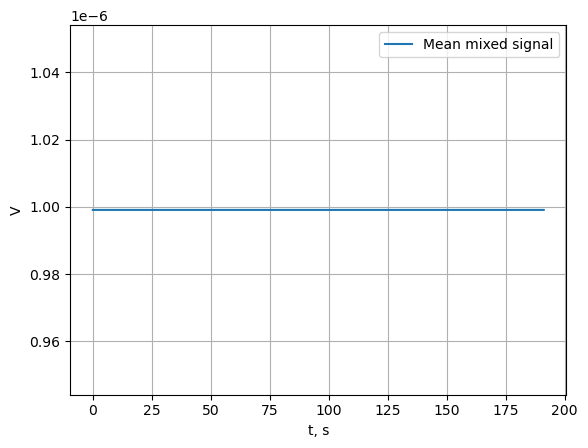

In [10]:
#mixing two signals:
plt.plot(t,[np.mean(np.multiply(sin_ref,noisy_1)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

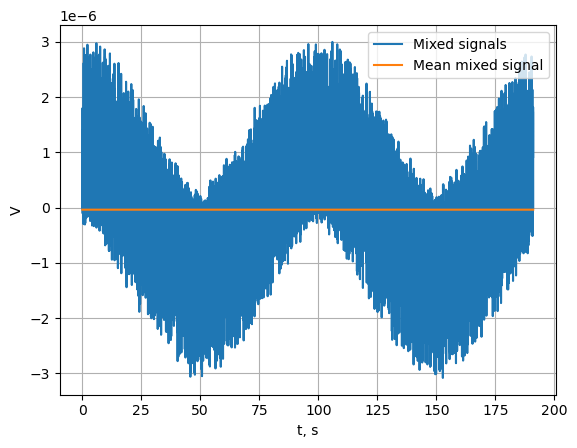

In [11]:
#mixing two signals:
plt.plot(t,np.multiply(sin_ref,noisy_2), label="Mixed signals")
plt.plot(t,[np.mean(np.multiply(sin_ref,noisy_2)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

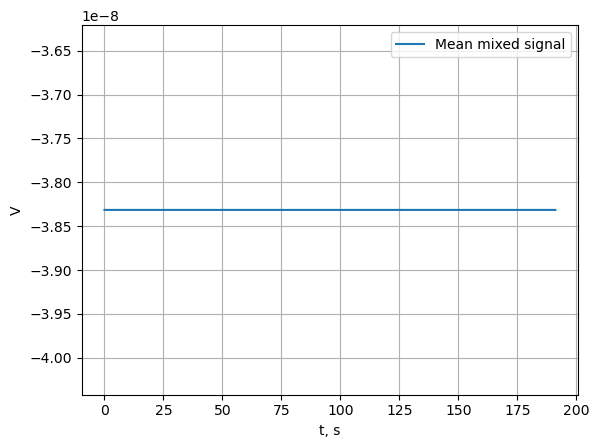

In [12]:
#mixing two signals:
plt.plot(t,[np.mean(np.multiply(sin_ref,noisy_2)).tolist()] * len(t), label="Mean mixed signal")
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()

# Realistic realization of the Lock-in measurements (lowpass filter):

In [13]:
# Number of points:
n = 10000
# Number of oscillations:
n_oscillations = 1000 
# Frequency of the reference signal:
f_ref = 3.14 #[Hz]
# Amplitude of the reference signal:
A_ref = 0.001*np.sqrt(2.0) #V
# Phase of the reference signal:
p_ref = 0*np.pi/180
# Time constant:
RC = 30.0 #s
# Cut-off frequency:
f_cut_off = 1.0/(2.0*np.pi*RC)
# Filter order:
n_filter = 1
# Array of time:
t = np.linspace(0, n_oscillations/f_ref, n)
# Reference signal:
sin_ref = A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref)
# Reference signal:
cos_ref = A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref)
# Slightly different signal:
sin_1 = 0.0012*np.sin(2.0*np.pi*3.15*t)

In [14]:
#Adding some noise:
noise_f = np.array([0.01*(2*np.random.random()-1) for a in range(n)])
noisy_1 = np.add(sin_ref, noise_f)
noisy_2 = np.add(sin_1, noise_f)

Designing of the low pass filter:

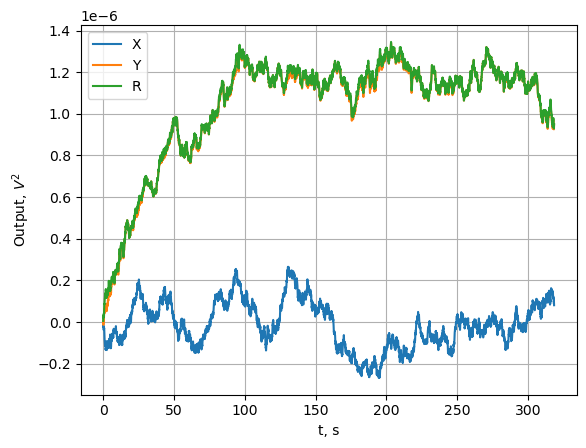

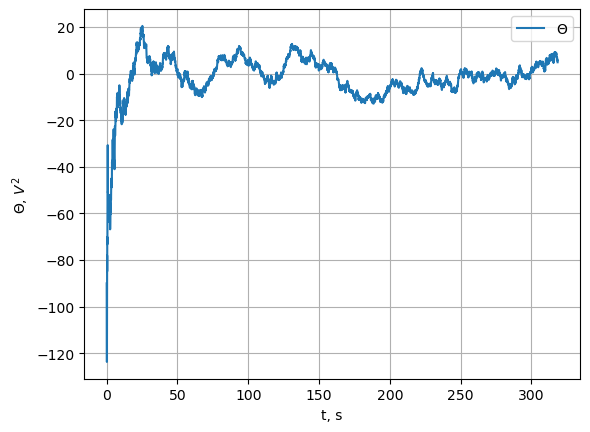

In [15]:
sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
X = signal.sosfilt(sos1, np.multiply(cos_ref,noisy_1))
Y = signal.sosfilt(sos1, np.multiply(sin_ref,noisy_1))
plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

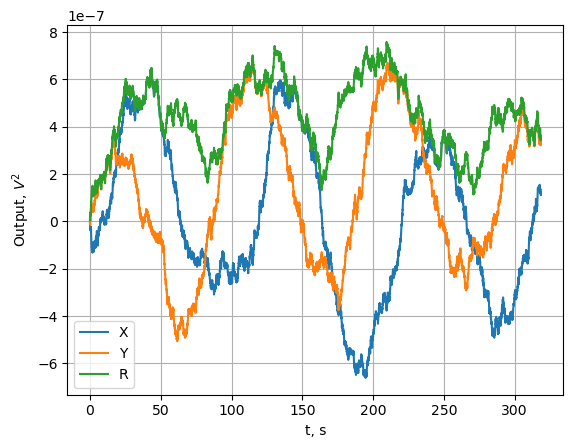

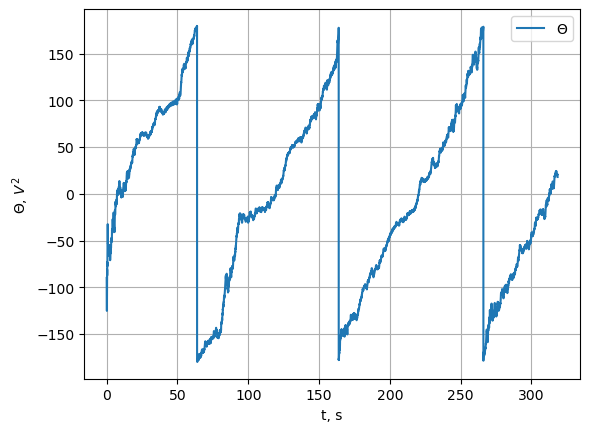

In [16]:
sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
X = signal.sosfilt(sos1, np.multiply(cos_ref,noisy_2))
Y = signal.sosfilt(sos1, np.multiply(sin_ref,noisy_2))
plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

In [17]:
def lowpass(x, alpha=(t[1]-t[0])/(RC + t[1]-t[0])):
    data = [x[0]]
    for a in x[1:]:
        data.append(data[-1] + (alpha*(a-data[-1])))
    return np.array(data)

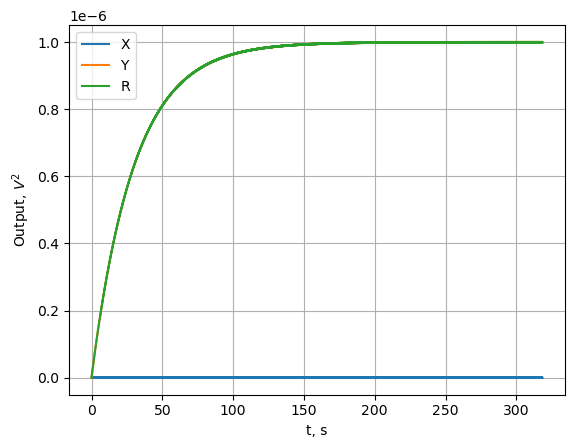

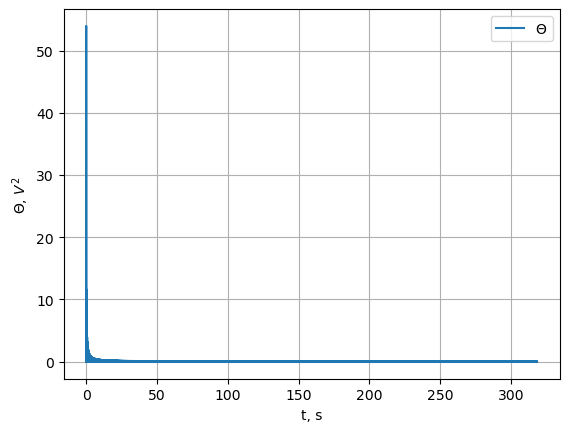

In [18]:
Y = lowpass(np.multiply(sin_ref,sin_ref))
X = lowpass(np.multiply(cos_ref,sin_ref))

plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

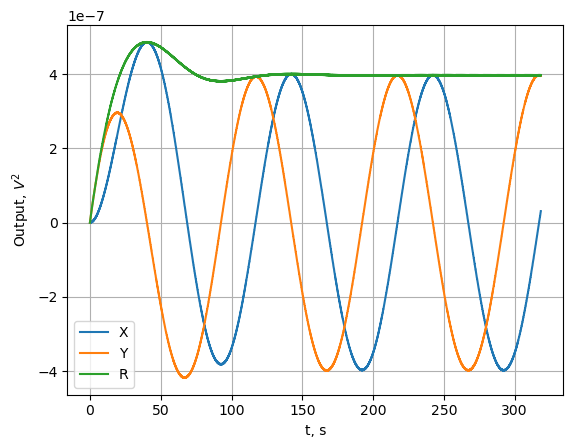

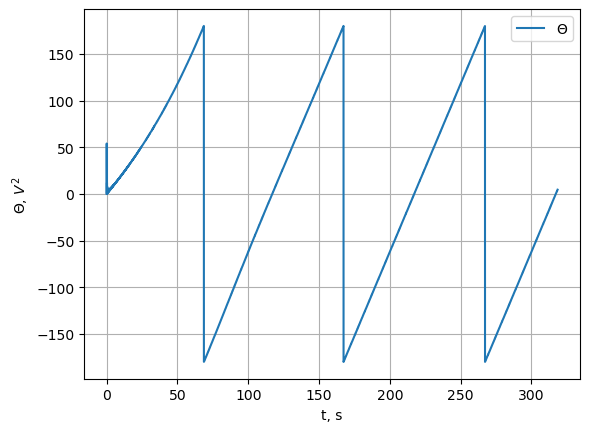

In [19]:
Y = lowpass(np.multiply(sin_ref,sin_1))
X = lowpass(np.multiply(cos_ref,sin_1))

plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

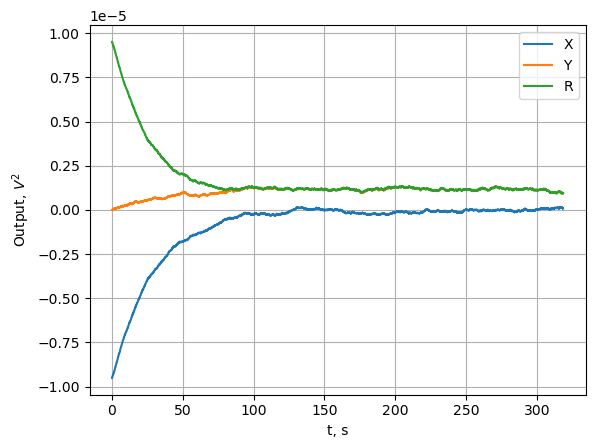

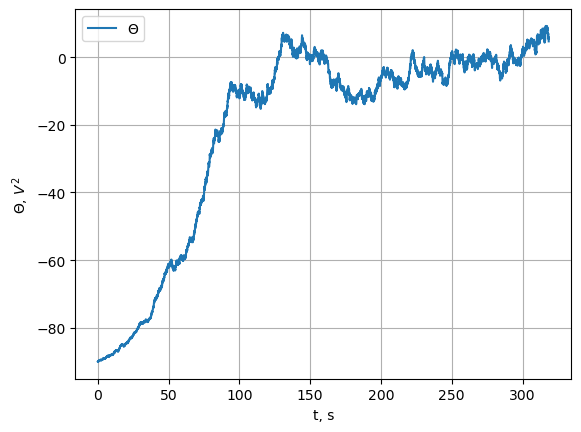

In [20]:
Y = lowpass(np.multiply(sin_ref,noisy_1))
X = lowpass(np.multiply(cos_ref,noisy_1))

plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

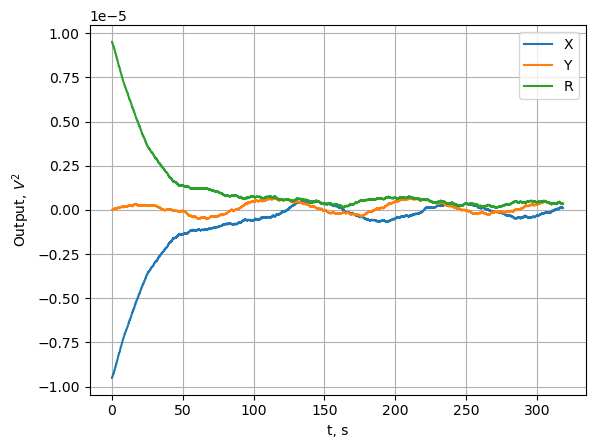

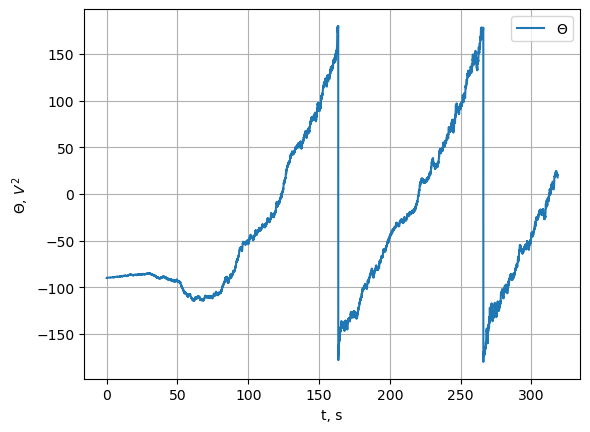

In [21]:
Y = lowpass(np.multiply(sin_ref,noisy_2))
X = lowpass(np.multiply(cos_ref,noisy_2))

plt.plot(t, X, label="X")
plt.plot(t, Y, label="Y")
plt.plot(t,  np.sqrt(X**2 + Y**2), label="R")
plt.xlabel("t, s")
plt.ylabel("Output, $V^2$")
plt.legend()
plt.grid()
plt.show()
plt.plot(t, 180*np.arctan2(X,Y)/np.pi, label="$\\Theta$")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $V^2$")
plt.legend()
plt.grid()
plt.show()

# Simulations of the $T\Omega$ resistor

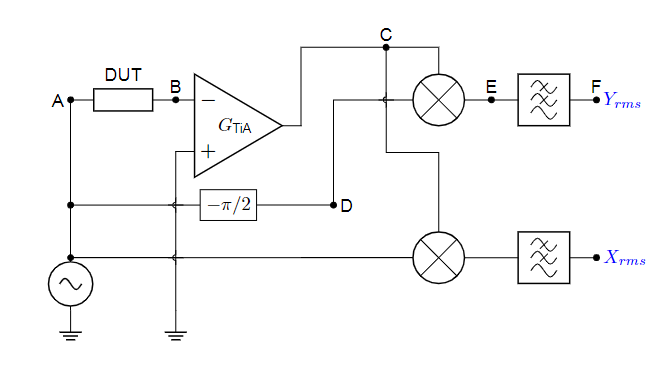

As a test, we assume that the DUT is a terraOhm resistor.

In [22]:
# Number of points:
n = 10000
# Frequency of the reference signal:
f_ref = 3.14 #[Hz]
# Amplitude of the reference signal:
A_ref = 0.001 #V
# Phase of the reference signal:
p_ref = 0*np.pi/180
# Time constant:
RC = 15.0 #s
# Cut-off frequency:
f_cut_off = 1.0/(2.0*np.pi*RC)
# Filter order:
n_filter = 1
# Array of time:
t = np.linspace(0, 5*RC, n)
# Noise amplitude:
A_noise_1 = 5e-4
A_noise_2 = 3e-6
A_noise_3 = 3e-3
# Reference signal:
sin_ref = A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
cos_ref = A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])

In [23]:
# The DUT current-function:
def DUT_R(VDS, R=1e12):
    return(VDS/R)

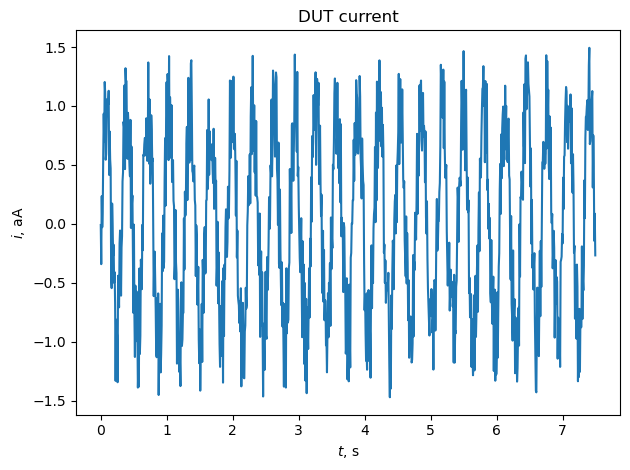

In [24]:
i_B = DUT_R(sin_ref)
plt.plot(t[:1000], i_B[:1000]*1e15)
plt.xlabel("$t$, s")
plt.ylabel("$i$, aA")
plt.title("DUT current")
plt.tight_layout()
plt.savefig("current_B.pdf")
plt.show()

SR 570 TiA model is based on the characteristic:
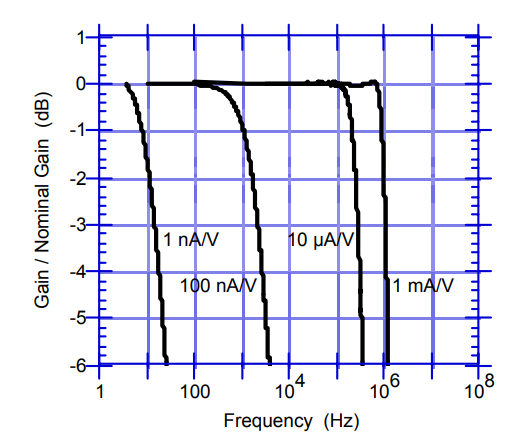

Works in 1nA/V regime

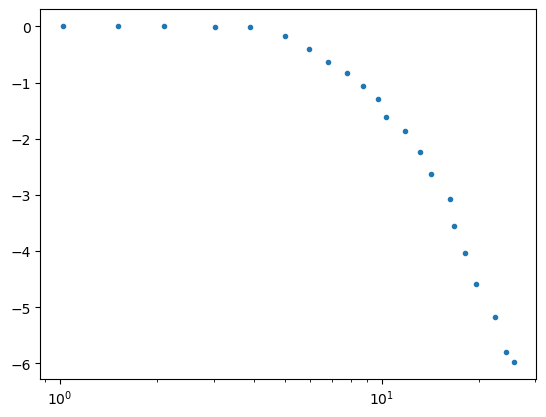

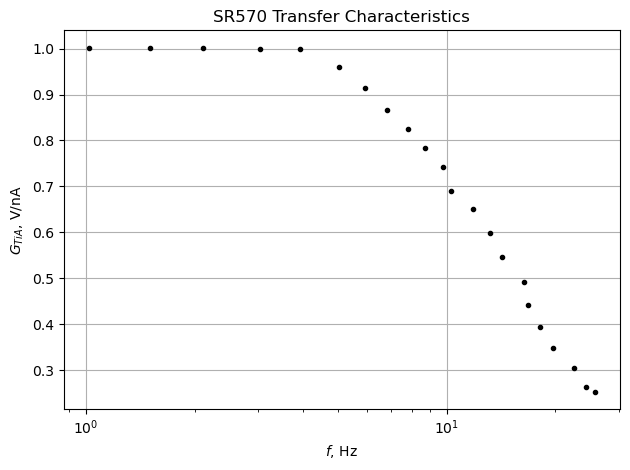

In [25]:
# SR570 TiA:
[f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T

plt.plot(f_SR570, gg_SR570, ".")
plt.xscale("log")
plt.show()

plt.plot(f_SR570, 1/(1e-9/10**(gg_SR570/10))/1e9, "k.")
plt.xscale("log")
plt.xlabel("$f$, Hz")
plt.ylabel("$G_{TiA}$, V/nA")
plt.title("SR570 Transfer Characteristics")
plt.grid()
plt.tight_layout()
plt.savefig("SR570_function.pdf")
plt.show()

def SR570_TiA(i, f):
    #return(i/(1e-9))
    return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))

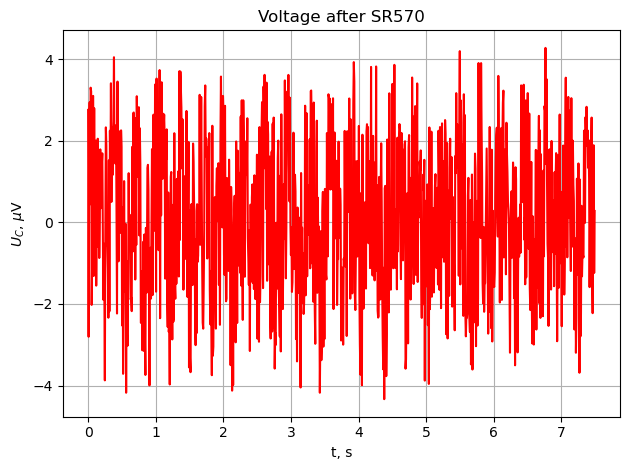

In [26]:
U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
plt.plot(t[:1000], 1e6*U_C[:1000], "r")
plt.xlabel("t, s")
plt.ylabel("$U_C$, $\mu$V")
plt.title("Voltage after SR570")
plt.grid()
plt.tight_layout()
plt.savefig("SR570_signal.pdf")
plt.show()

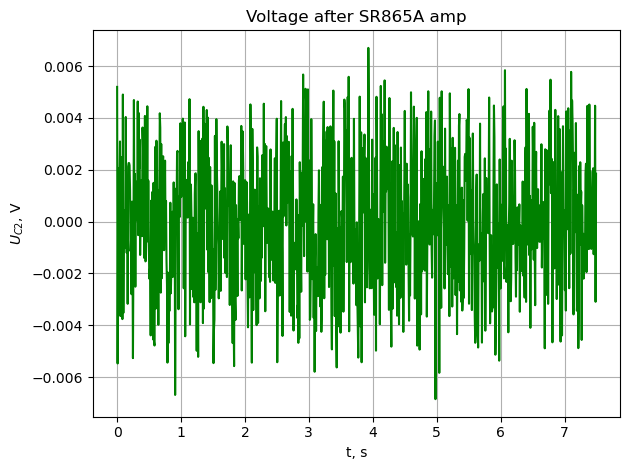

In [27]:
U_C2 = U_C/10e-3*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
plt.plot(t[:1000], U_C2[:1000], "g")
plt.xlabel("t, s")
plt.ylabel("$U_{C2}$, V")
plt.title("Voltage after SR865A amp")
plt.grid()
plt.tight_layout()
plt.savefig("SR865A_amp_signal.pdf")
plt.show()

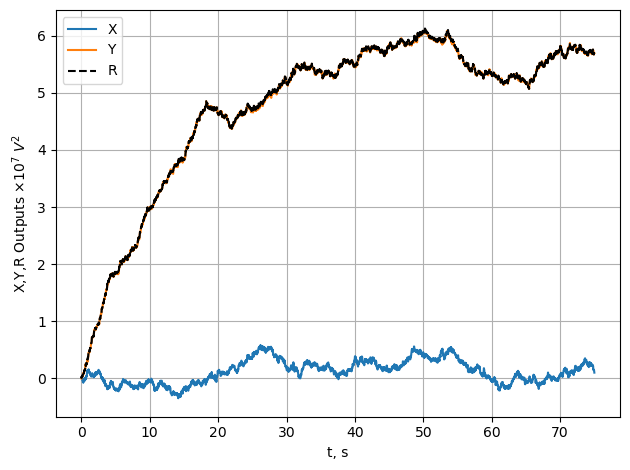

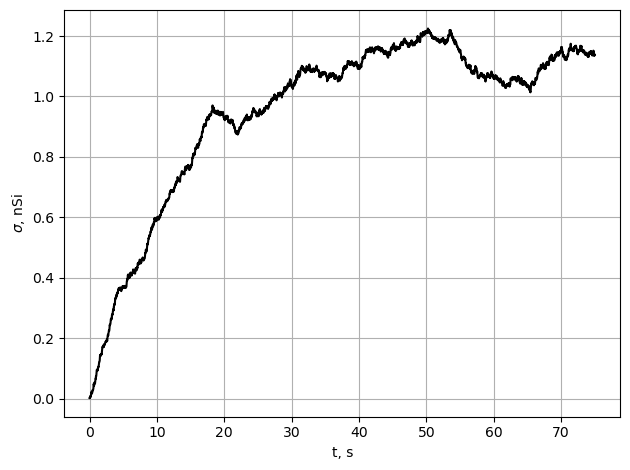

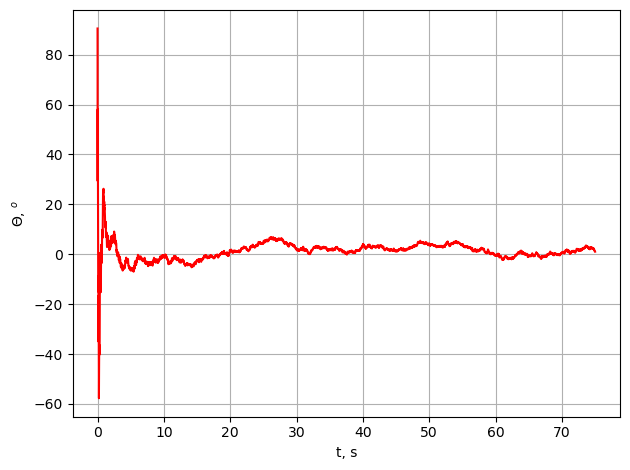

In [28]:
sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))

X = signal.sosfilt(sos1, np.multiply(U_C2,cos_ref))
Y = signal.sosfilt(sos1, np.multiply(U_C2,sin_ref))

plt.plot(t, X*1e7, label="X")
plt.plot(t, Y*1e7, label="Y")
plt.plot(t, np.sqrt(X**2 + Y**2)*1e7, "k--", label="R")
plt.xlabel("t, s")
plt.ylabel("X,Y,R Outputs $\\times 10^7$ $V^2$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("XYR_SR865A.pdf")
plt.show()

plt.plot(t, 2*1e-9*np.sqrt(X**2 + Y**2)/1e-3*1e12, "k")
plt.xlabel("t, s")
plt.ylabel("$\\sigma$, nSi")
plt.grid()
plt.tight_layout()
plt.savefig("G_SR865A.pdf")
plt.show()

plt.plot(t, 180*np.arctan2(X,Y)/np.pi, "r")
plt.xlabel("t, s")
plt.ylabel("$\\Theta$, $^o$")
plt.grid()
plt.tight_layout()
plt.savefig("Theta_SR865A.pdf")
plt.show()

In [29]:
f = 10**np.linspace(-1,6, 100)
RR = []
RR1 = []
Theta = []
for ff in f:
    # Number of points:
    n = 20000
    # Frequency of the reference signal:
    f_ref = ff #3.14 #[Hz]
    # Amplitude of the reference signal:
    A_ref = 0.001 #V
    # Phase of the reference signal:
    p_ref = 0*np.pi/180
    # Time constant:
    RC = 3 #s
    # Cut-off frequency:
    f_cut_off = 1.0/(2.0*np.pi*RC)
    # Filter order:
    n_filter = 1
    # Array of time:
    t = np.linspace(0, 30/RC, n)
    # Noise amplitude:
    A_noise_1 = 5e-4
    A_noise_2 = 3e-6
    A_noise_3 = 3e-3
    # Reference signal:
    sin_ref = A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    cos_ref = A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    i_B = DUT_R(sin_ref) 
    U_C = SR570_TiA(i_B, ff) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
    U_C2 = U_C/10e-3*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
    sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
    X = signal.sosfilt(sos1, np.multiply(U_C2,cos_ref))
    Y = signal.sosfilt(sos1, np.multiply(U_C2,sin_ref))
    RR.append(np.sqrt(X[-1]**2 + Y[-1]**2))
    RR1.append(np.sqrt(np.mean(np.multiply(U_C2,cos_ref))**2 + np.mean(np.multiply(U_C2,sin_ref))**2))
    Theta.append(np.arctan2(X[-1],Y[-1]))

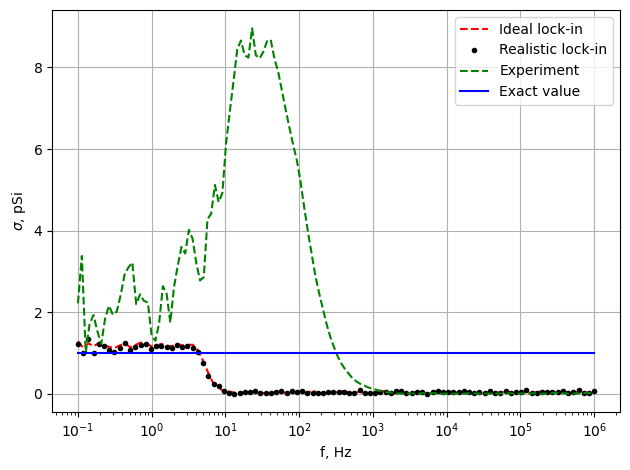

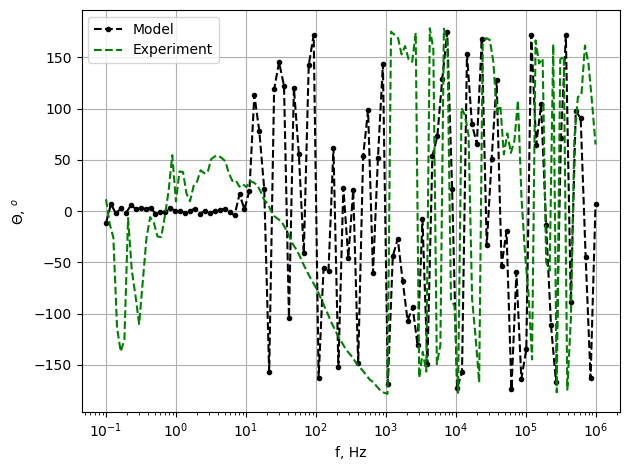

In [30]:
# SR570 TiA:
[no, freq, X_m, Y_m, R_m, T_m] = np.genfromtxt("measured.csv", delimiter = ",", comments="#").T


plt.plot(f,2*1e-9*np.array(RR1)/(1e-3*1e-12), "r--", label="Ideal lock-in")
plt.plot(f,2*1e-9*np.array(RR)/(1e-3*1e-12), "k.", label="Realistic lock-in")
plt.plot(freq,2*1e-9*R_m/(1e-3*1e-12), "g--", label="Experiment")
plt.plot([f[0],f[-1]], [1.0]*2, "b-", label="Exact value")
plt.legend()
plt.grid()
plt.xscale("log")
plt.xlabel("f, Hz")
plt.ylabel("$\\sigma$, pSi")
plt.tight_layout()
plt.savefig("Conductance_f_TOhm.pdf")
plt.show()

plt.plot(f,180*np.array(Theta)/np.pi, "k.--", label="Model")
plt.plot(freq,T_m, "g--", label="Experiment")
plt.legend()
plt.grid()
plt.xscale("log")
plt.xlabel("f, Hz")
plt.ylabel("$\\Theta$, $^o$")
plt.tight_layout()
plt.savefig("Theta_f_TOhm.pdf")
plt.show()

# Quantum DUT (Variable capacitance + phase-noise)

Here we are starting from the $\frac{\mathrm{d}i_\text{DS}}{\mathrm{d}V_\text{DS}}$. Then getting the $i_\text{DS}(V_\text{DS})$ as an integral:
$$
i_\text{DS}(V_\text{DS}) = \int_{V_\text{DS min}}^{V_\text{DS}} G(V) \mathrm{d}V
$$

In [31]:
#The DUT current-function with fixed VGD:
def DUT_Semiconductor(VDS, VGmax=[0.0, 5e-3], Gmax=[1e-9, 2e-9], wmax = [1e-6, 2e-6], N=10001, VDSmin=-2.5e-2, VDSmax = 2.5e-2, exp_A=6e-11, exp_B=30):
    i = exp_A*np.exp(exp_B*VDS)
    G = exp_A*exp_B*np.exp(exp_B*VDS)
    VV = np.linspace(VDSmin, VDS, N)
    GG = exp_A*exp_B*np.exp(exp_B*VV)
    for VG,Gm,wm in zip(VGmax, Gmax, wmax):
        G+= Gm*np.exp(-np.square(VDS-VG)/wm)
        GG += Gm*np.exp(-np.square(VV-VG)/wm)
    i += np.sum(GG)*(VV[1]-VV[0])
    return([G, i])

In [32]:
V = np.linspace(-2.5e-2, 2.5e-2, 1001)
G = []
i = []
for VV in V:
    GG, ii = DUT_Semiconductor(VV)
    G.append(GG)
    i.append(ii)
    
def G_interp(Vin):
    return(np.interp(Vin,V,G))
def i_interp(Vin):
    return(np.interp(Vin,V,i))

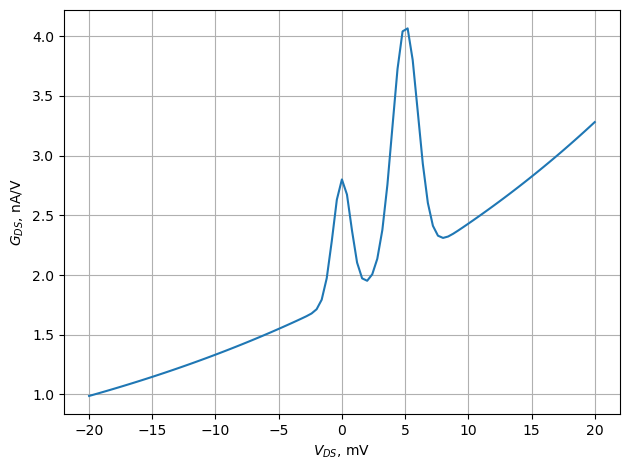

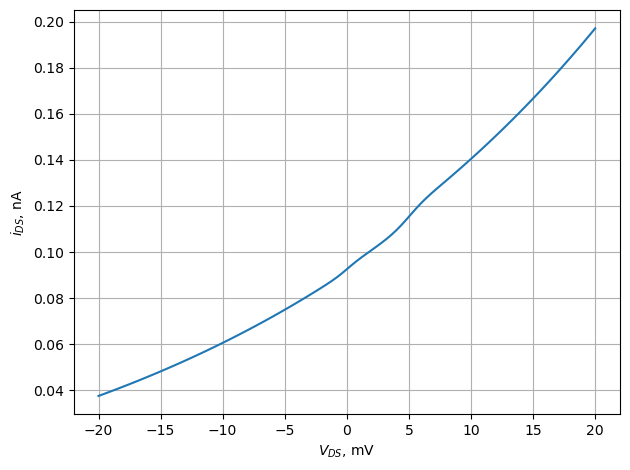

In [33]:
Vtest = np.linspace(-2e-2, 2e-2, 101)
plt.plot(Vtest*1000,G_interp(Vtest)*1e9)
plt.xlabel("$V_{DS}$, mV")
plt.ylabel("$G_{DS}$, nA/V")
plt.grid()
plt.tight_layout()
plt.savefig("diff_conductance.pdf")
plt.show()
plt.plot(Vtest*1000,i_interp(Vtest)*1e9)
plt.xlabel("$V_{DS}$, mV")
plt.ylabel("$i_{DS}$, nA")
plt.grid()
plt.tight_layout()
plt.savefig("current_DUT.pdf")
plt.show()

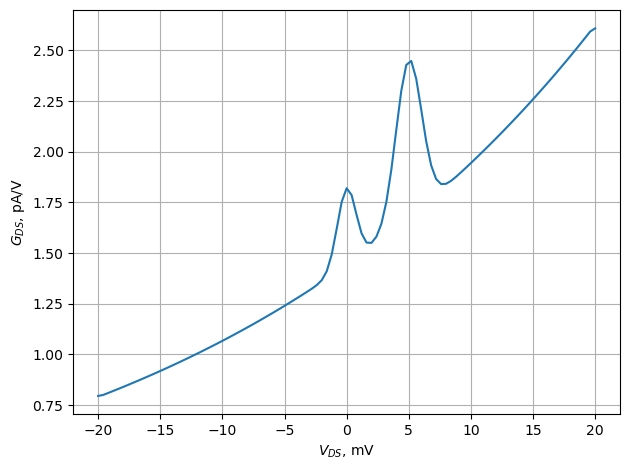

In [34]:
plt.plot(Vtest*1000,np.gradient(i_interp(Vtest))*1e12)
plt.xlabel("$V_{DS}$, mV")
plt.ylabel("$G_{DS}$, pA/V")
plt.grid()
plt.tight_layout()
plt.savefig("diff_conductance.pdf")
plt.show()

## Applying the Lock-in model in noisless regime

In [35]:
V_bias = np.linspace(-2e-2, 2e-2, 501)
RR_filt = []
RR_ideal = []
Theta = []

[f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T
def SR570_TiA(i, f):
    #return(i/(1e-9))
    return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))

for Vb in V_bias:
    # Number of points:
    n = 50000
    # Frequency of the reference signal:
    f_ref = 3.14 #[Hz]
    # Amplitude of the reference signal:
    A_ref = 0.001 #V
    # Phase of the reference signal:
    p_ref = 0*np.pi/180
    # Time constant:
    RC = 5 #s
    # Cut-off frequency:
    f_cut_off = 1.0/(2.0*np.pi*RC)
    # Filter order:
    n_filter = 1
    # Array of time:
    t = np.linspace(0, 50/f_ref, n)
    # Noise amplitude:
    A_noise_1 = 0
    A_noise_2 = 0
    A_noise_3 = 0
    # Reference signal:
    sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    i_B = i_interp(sin_ref)
    U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
    U_C2 = U_C/100*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
    sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
    X = signal.sosfilt(sos1, np.multiply(U_C2-np.average(U_C2),cos_ref-np.average(cos_ref)))
    Y = signal.sosfilt(sos1, np.multiply(U_C2-np.average(U_C2),sin_ref-np.average(sin_ref)))
    RR_filt.append(np.sqrt(X[-1]**2 + Y[-1]**2))
    RR_ideal.append(np.sqrt(np.mean(np.multiply(U_C2-np.average(U_C2),cos_ref-np.average(cos_ref)))**2 + np.mean(np.multiply(U_C2-np.average(U_C2),sin_ref-np.average(sin_ref)))**2))
    Theta.append(np.arctan2(X[-1],Y[-1]))

KeyboardInterrupt: 

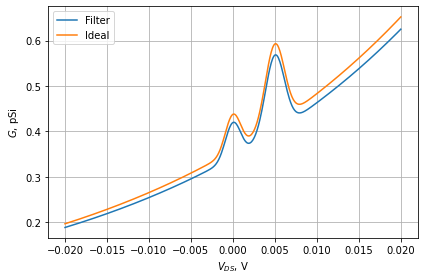

In [ ]:
plt.plot(V_bias, 2*1e-9*np.array(RR_filt)/1e-3*1e12, label="Filter")
plt.plot(V_bias, 2*1e-9*np.array(RR_ideal)/1e-3*1e12, label="Ideal")
plt.xlabel("$V_{DS}$, V")
plt.ylabel("$G$, pSi")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("no_Noise_G.pdf")
plt.show()

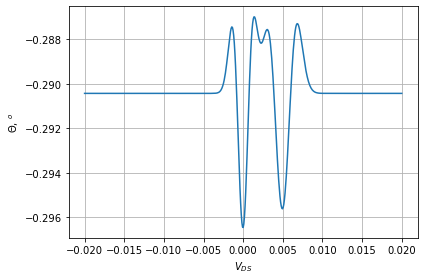

In [ ]:
plt.plot(V_bias, 180*np.array(Theta)/np.pi)
plt.xlabel("$V_{DS}$")
plt.ylabel("$\\Theta$, $^o$")
plt.grid()
plt.tight_layout()
plt.savefig("no_Noise_Theta.pdf")
plt.show()

## Applying the Lock-in model with stationary noise:

In [ ]:
V_bias = np.linspace(-2e-2, 2e-2, 501)
RR_noise_filt = []
RR_noise_ideal = []
Theta_noise = []

[f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T
def SR570_TiA(i, f):
    #return(i/(1e-9))
    return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))

for Vb in V_bias:
    # Number of points:
    n = 20000
    # Frequency of the reference signal:
    f_ref = 3.14 #[Hz]
    # Amplitude of the reference signal:
    A_ref = 0.001 #V
    # Phase of the reference signal:
    p_ref = 0*np.pi/180
    # Time constant:
    RC = 3 #s
    # Cut-off frequency:
    f_cut_off = 1.0/(2.0*np.pi*RC)
    # Filter order:
    n_filter = 1
    # Array of time:
    t = np.linspace(0, 30/RC, n)
    # Noise amplitude:
    A_noise_1 = 5e-4
    A_noise_2 = 3e-6
    A_noise_3 = 3e-3
    # Reference signal:
    sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    i_B = i_interp(sin_ref)
    U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
    U_C2 = U_C/100*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
    sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
    X = signal.sosfilt(sos1, np.multiply(U_C2-np.average(U_C2),cos_ref-np.average(cos_ref)))
    Y = signal.sosfilt(sos1, np.multiply(U_C2-np.average(U_C2),sin_ref-np.average(sin_ref)))
    RR_noise_filt.append(np.sqrt(X[-1]**2 + Y[-1]**2))
    RR_noise_ideal.append(np.sqrt(np.mean(np.multiply(U_C2-np.average(U_C2),cos_ref-np.average(cos_ref)))**2 + np.mean(np.multiply(U_C2-np.average(U_C2),sin_ref-np.average(sin_ref)))**2))
    Theta_noise.append(np.arctan2(X[-1],Y[-1]))

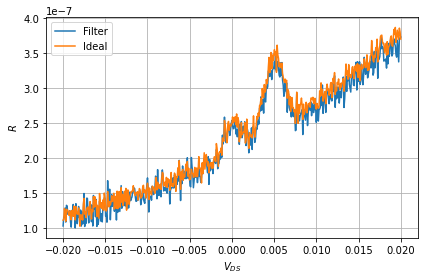

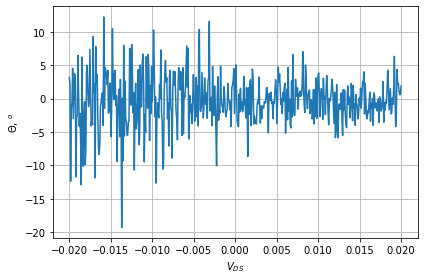

In [ ]:
plt.plot(V_bias, RR_noise_filt, label="Filter")
plt.plot(V_bias, RR_noise_ideal, label="Ideal")
plt.xlabel("$V_{DS}$")
plt.ylabel("$R$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Noise_R.pdf")
plt.show()

plt.plot(V_bias, 180*np.array(Theta_noise)/np.pi)
plt.xlabel("$V_{DS}$")
plt.ylabel("$\\Theta$, $^o$")
plt.grid()
plt.tight_layout()
plt.savefig("Noise_Theta.pdf")
plt.show()

## Applying the non-stationary noise:

In [ ]:
V_bias = np.linspace(-2e-2, 2e-2, 11)
RR_noise_filt = []
RR_noise_ideal = []
Theta_noise = []

[f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T
def SR570_TiA(i, f):
    return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))

for Vb in V_bias:
    # Number of points:
    n = 20000
    # Frequency of the reference signal:
    f_ref = 3.14 #[Hz]
    # Amplitude of the reference signal:
    A_ref = 0.001 #V
    # Phase of the reference signal:
    p_ref = 0*np.pi/180
    # Time constant:
    RC = 3 #s
    # Cut-off frequency:
    f_cut_off = 1.0/(2.0*np.pi*RC)
    # Filter order:
    n_filter = 1
    # Array of time:
    t = np.linspace(0, 30/RC, n)
    # Noise amplitude:
    A_noise_1 = 5e-4
    A_noise_2 = 3e-6
    A_noise_3 = 3e-3
    A_noise_4 = 5e-1
    # Reference signal:
    sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
    i_B = i_interp(sin_ref)
    U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
    U_C2 = U_C/100*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
    ft = np.fft.fft(U_C2)
    fr = np.fft.fftfreq(n, d=t[1]-t[0])
    U_C3 = np.fft.ifft(np.fft.fft(U_C2) + np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) + 1j*np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) )
    #plt.plot(U_C3[:300])
    #plt.show()
    sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
    X = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),cos_ref-np.average(cos_ref)))
    Y = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),sin_ref-np.average(sin_ref)))
    RR_noise_filt.append(np.sqrt(X[-1]**2 + Y[-1]**2))
    RR_noise_ideal.append(np.sqrt(np.mean(np.multiply(U_C3-np.average(U_C3),cos_ref-np.average(cos_ref)))**2 + np.mean(np.multiply(U_C3-np.average(U_C3),sin_ref-np.average(sin_ref)))**2))
    Theta_noise.append(np.arctan2(np.abs(X[-1]),np.abs(Y[-1])))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


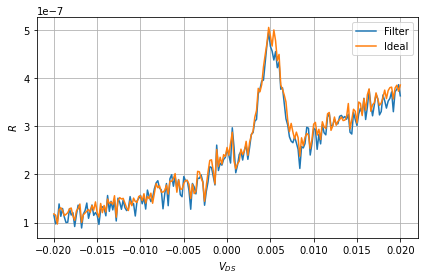

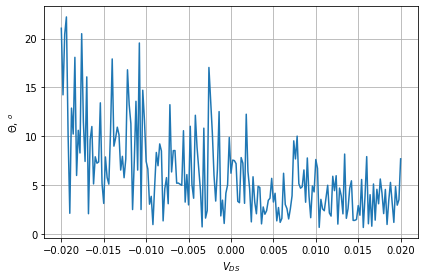

In [ ]:
plt.plot(V_bias, RR_noise_filt, label="Filter")
plt.plot(V_bias, RR_noise_ideal, label="Ideal")
plt.xlabel("$V_{DS}$")
plt.ylabel("$R$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(V_bias, 180*np.array(Theta_noise)/np.pi)
plt.xlabel("$V_{DS}$")
plt.ylabel("$\\Theta$, $^o$")
plt.grid()
plt.tight_layout()
plt.show()

## Non-stationary noise. Telegraphic process at the transitions.

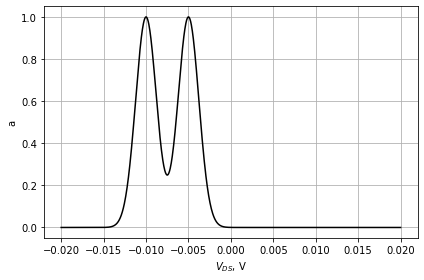

In [ ]:
def telegr(Vbias, Vbmax=[-1e-2, -5e-3], wmax = [3e-6, 3e-6]):
    out = np.zeros(len(Vbias))
    for Vb,wb in zip(Vbmax,wmax):
        out+= np.exp(-np.square(Vbias - Vb)/wb)
    return(out)

Vbb = np.linspace(-2e-2,2e-2,1000)
plt.plot(Vbb, telegr(Vbb), "k")
plt.xlabel("$V_{DS}$, V")
plt.ylabel("a")
plt.grid()
plt.tight_layout()
plt.savefig("tlegraph.pdf")
plt.show()

In [ ]:
[f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T
def SR570_TiA(i, f):
    return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))


V_bias = np.linspace(-2e-2, 2e-2, 201)

tgrn = telegr(V_bias)

RRs = []
TTs = []

for l in range(30):
    RR_noise_filt = []
    Theta_noise = []
    for Vb, a in zip(V_bias,tgrn):
        # Number of points:
        n = 20000
        # Frequency of the reference signal:
        f_ref = 3.14 #[Hz]
        # Amplitude of the reference signal:
        A_ref = 0.001 #V
        # Phase of the reference signal:
        p_ref = 0*np.pi/180
        # Time constant:
        RC = 3 #s
        # Cut-off frequency:
        f_cut_off = 1.0/(2.0*np.pi*RC)
        # Filter order:
        n_filter = 1
        # Array of time:
        t = np.linspace(0, 30/RC, n)
        # Noise amplitude:
        A_noise_1 = 5e-4
        A_noise_2 = 3e-6
        A_noise_3 = 3e-3
        A_noise_4 = 5e-1
        # Reference signal:
        sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
        cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
        i_B1 = i_interp(sin_ref)
        i_max = np.max(i_B1)
        i_min = np.min(i_B1)
        # Number of switches:
        Nsw = 100
        # Times of switches:
        tsw = np.sort(np.random.rand(Nsw))*t[-1]
        i_B = []
        sw = True
        j = 0
        for k in range(len(i_B1)):
            i_B.append(i_B1[k])
            if(t[k]>tsw[j]):
                if(j<len(tsw)-1):
                    j+=1
                sw = not sw
            if sw:
                i_B[-1] += a*i_max
            else:
                i_B[-1] += a*i_min
        i_B = np.array(i_B)
        U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
        U_C2 = U_C/100*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
        ft = np.fft.fft(U_C2)
        fr = np.fft.fftfreq(n, d=t[1]-t[0])
        U_C3 = np.fft.ifft(np.fft.fft(U_C2) + np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) + 1j*np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) )
        sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
        X = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),cos_ref-np.average(cos_ref)))
        Y = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),sin_ref-np.average(sin_ref)))
        RR_noise_filt.append(np.sqrt(X[-1]**2 + Y[-1]**2))
        Theta_noise.append(np.arctan2(np.real(X[-1]),np.real(Y[-1])))
    RRs.append(RR_noise_filt)
    TTs.append(Theta_noise)
    print(l)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


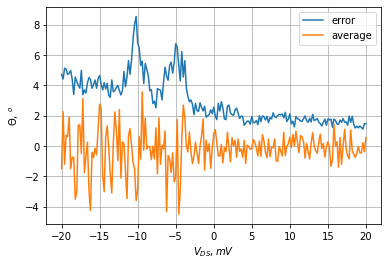

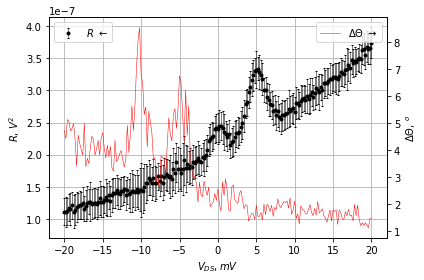

In [ ]:
RRs=np.array(RRs)
TTs=np.array(TTs)

TT_avg = np.mean(TTs,axis=0)
TT_std = np.std(TTs,axis=0)

plt.plot(V_bias*1000,180*2.7*TT_std/np.sqrt(30)/np.pi, label="error")
plt.plot(V_bias*1000,180*TT_avg/np.pi, label="average")
plt.xlabel("$V_{DS}, mV$")
plt.ylabel("$\\Theta$, $^o$")
plt.grid()
plt.legend()
plt.show()

RR_avg = np.mean(RRs,axis=0)
RR_std = np.std(RRs,axis=0)

plt.errorbar(V_bias*1000,np.real(RR_avg),np.real(RR_std), fmt="k.", linewidth=0.5, capsize=1, label="$R$ $\\leftarrow$")
plt.xlabel("$V_{DS}, mV$")
plt.ylabel("$R$, $V^2$")
plt.legend()
plt.grid()
ax = plt.twinx()
plt.plot(V_bias*1000,180*2.7*TT_std/np.sqrt(30)/np.pi,"r",linewidth=0.5, label="$\\Delta\\Theta$ $\\rightarrow$")
plt.ylabel("$\\Delta\\Theta$, $^o$")
plt.legend()
plt.tight_layout()
plt.savefig("non_stationary.pdf")
plt.show()

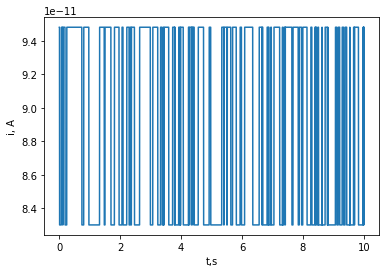

In [ ]:
Vb = -1.0e-3

sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
i_B1 = i_interp(sin_ref)
i_max = np.max(i_B1)
i_min = np.min(i_B1)
# Number of switches:
Nsw = NNN
# Times of switches:
tsw = np.sort(np.random.rand(Nsw))*t[-1]
i_B = []
sw = True
j = 0

a = 1

for k in range(len(i_B1)):
    i_B.append((1-a)*i_B1[k])
    if(t[k]>tsw[j]):
        if(j<len(tsw)-1):
            j+=1
        sw = not sw
    if sw:
        i_B[-1] += a*i_max
    else:
        i_B[-1] += a*i_min
        
plt.plot(t,i_B)
plt.xlabel("t,s")
plt.ylabel("i, A")
plt.savefig("telegraph_process.pdf")

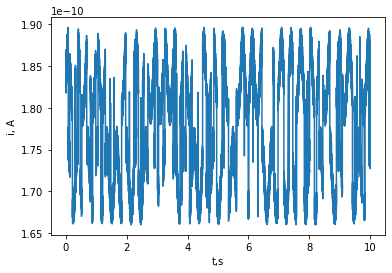

In [ ]:
Vb = -1.0e-3

sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
i_B1 = i_interp(sin_ref)
i_max = np.max(i_B1)
i_min = np.min(i_B1)
# Number of switches:
Nsw = NNN
# Times of switches:
tsw = np.sort(np.random.rand(Nsw))*t[-1]
i_B = []
sw = True
j = 0

a = 1

for k in range(len(i_B1)):
    i_B.append(i_B1[k])
    if(t[k]>tsw[j]):
        if(j<len(tsw)-1):
            j+=1
        sw = not sw
    if sw:
        i_B[-1] += a*i_max
    else:
        i_B[-1] += a*i_min
        
plt.plot(t,i_B)
plt.xlabel("t,s")
plt.ylabel("i, A")
plt.savefig("telegraph_process_sin.pdf")

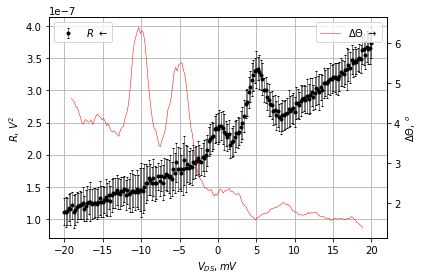

In [ ]:
w = 10
TT_filt=[]
Vb_filt=[]
for i in range(len(TT_std)-w):
    TT_filt.append(np.mean(TT_std[i:i+w]))
    Vb_filt.append(np.mean(V_bias[i:i+w]))
TT_filt=np.array(TT_filt)
Vb_filt=np.array(Vb_filt)

plt.errorbar(V_bias*1000,np.real(RR_avg),np.real(RR_std), fmt="k.", linewidth=0.5, capsize=1, label="$R$ $\\leftarrow$")
plt.xlabel("$V_{DS}, mV$")
plt.ylabel("$R$, $V^2$")
plt.legend()
plt.grid()
ax = plt.twinx()
plt.plot(Vb_filt*1000,180*2.7*TT_filt/np.sqrt(30)/np.pi,"r",linewidth=0.5, label="$\\Delta\\Theta$ $\\rightarrow$")
plt.ylabel("$\\Delta\\Theta$, $^o$")
plt.legend()
plt.tight_layout()
plt.savefig("non_stationary_filt.pdf")
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


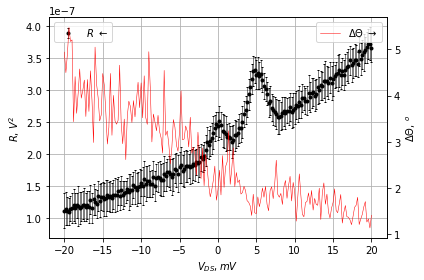

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


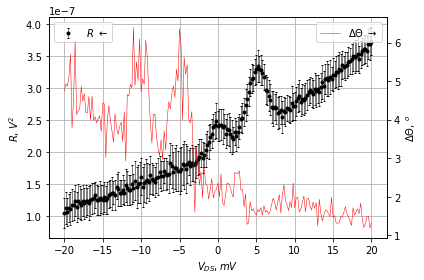

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


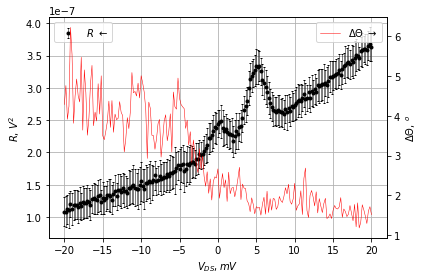

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


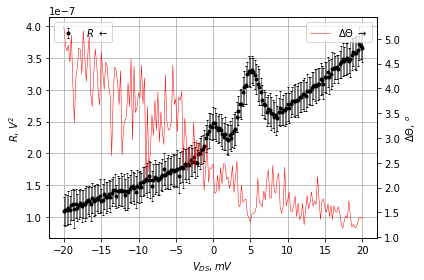

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


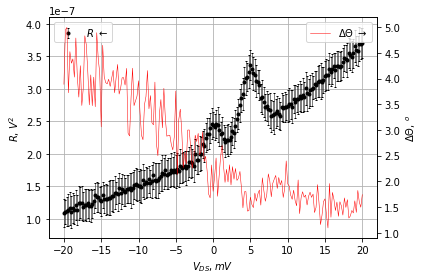

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


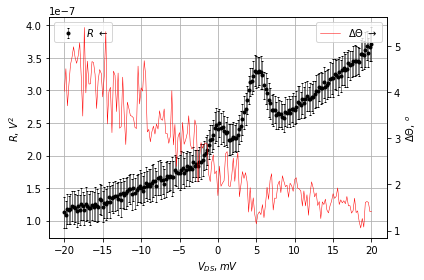

In [ ]:
for Nsw in [10,100,500,1000,2000,5000]:    
    [f_SR570, gg_SR570] = np.genfromtxt("SR570_Gain_f.csv", delimiter = ",").T
    def SR570_TiA(i, f):
        return( i/(1e-9/10**np.where(f<f_SR570[0], gg_SR570[0], np.where( f>f_SR570[-1], gg_SR570[-1], np.interp(f,f_SR570, gg_SR570) )) ))


    V_bias = np.linspace(-2e-2, 2e-2, 201)

    tgrn = telegr(V_bias)

    RRs = []
    TTs = []

    for l in range(30):
        RR_noise_filt = []
        Theta_noise = []
        for Vb, a in zip(V_bias,tgrn):
            # Number of points:
            n = 20000
            # Frequency of the reference signal:
            f_ref = 3.14 #[Hz]
            # Amplitude of the reference signal:
            A_ref = 0.001 #V
            # Phase of the reference signal:
            p_ref = 0*np.pi/180
            # Time constant:
            RC = 3 #s
            # Cut-off frequency:
            f_cut_off = 1.0/(2.0*np.pi*RC)
            # Filter order:
            n_filter = 1
            # Array of time:
            t = np.linspace(0, 30/RC, n)
            # Noise amplitude:
            A_noise_1 = 5e-4
            A_noise_2 = 3e-6
            A_noise_3 = 3e-3
            A_noise_4 = 5e-1
            # Reference signal:
            sin_ref = Vb + A_ref*np.sin(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
            cos_ref = Vb + A_ref*np.cos(2.0*np.pi*f_ref*t + p_ref) + np.array([A_noise_1*(2*np.random.random()-1) for a in range(n)])
            i_B1 = i_interp(sin_ref)
            i_max = np.max(i_B1)
            i_min = np.min(i_B1)
            # Times of switches:
            tsw = np.sort(np.random.rand(Nsw))*t[-1]
            i_B = []
            sw = True
            j = 0
            for k in range(len(i_B1)):
                i_B.append(i_B1[k])
                if(t[k]>tsw[j]):
                    if(j<len(tsw)-1):
                        j+=1
                    sw = not sw
                if sw:
                    i_B[-1] += a*i_max
                else:
                    i_B[-1] += a*i_min
            i_B = np.array(i_B)
            U_C = SR570_TiA(i_B, f_ref) + np.array([A_noise_2*(2*np.random.random()-1) for a in range(n)])
            U_C2 = U_C/100*10 + np.array([A_noise_3*(2*np.random.random()-1) for a in range(n)])
            ft = np.fft.fft(U_C2)
            fr = np.fft.fftfreq(n, d=t[1]-t[0])
            U_C3 = np.fft.ifft(np.fft.fft(U_C2) + np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) + 1j*np.array([A_noise_4*(2*np.random.random()-1) for a in range(n)]) )
            sos1 = signal.butter(n_filter, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
            X = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),cos_ref-np.average(cos_ref)))
            Y = signal.sosfilt(sos1, np.multiply(U_C3-np.average(U_C3),sin_ref-np.average(sin_ref)))
            RR_noise_filt.append(np.sqrt(X[-1]**2 + Y[-1]**2))
            Theta_noise.append(np.arctan2(np.real(X[-1]),np.real(Y[-1])))
        RRs.append(RR_noise_filt)
        TTs.append(Theta_noise)
        print(l)
    RRs=np.array(RRs)
    TTs=np.array(TTs)

    TT_avg = np.mean(TTs,axis=0)
    TT_std = np.std(TTs,axis=0)

    RR_avg = np.mean(RRs,axis=0)
    RR_std = np.std(RRs,axis=0)

    plt.errorbar(V_bias*1000,np.real(RR_avg),np.real(RR_std), fmt="k.", linewidth=0.5, capsize=1, label="$R$ $\\leftarrow$")
    plt.xlabel("$V_{DS}, mV$")
    plt.ylabel("$R$, $V^2$")
    plt.legend()
    plt.grid()
    ax = plt.twinx()
    plt.plot(V_bias*1000,180*2.7*TT_std/np.sqrt(30)/np.pi,"r",linewidth=0.5, label="$\\Delta\\Theta$ $\\rightarrow$")
    plt.ylabel("$\\Delta\\Theta$, $^o$")
    plt.legend()
    plt.tight_layout()
    plt.savefig("non_stationary%d.pdf"%Nsw)
    plt.show()